# Sydney House Prices Linear Regression

![](https://i.pinimg.com/originals/d3/18/13/d3181322e4522cf897fa8c1a038c6a2d.gif)

## Content

Sydney property prices from 2000 to 2019

### The following steps were followed in this project:

* Import Module and Data
* Data Analysis
* Creating a Table Describing The Detailed Properties Of The Data
* Data Visualization
* Data Classification
* Get Dummies
* Outlier Data
* Missing Data Filling
* Building a Model

# Import Module and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("SydneyHousePrices.csv")
# Link data : https://www.kaggle.com/mihirhalai/sydney-house-prices?select=SydneyHousePrices.csv

# Data Analysis

In [3]:
df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Id,postalCode,sellPrice,bed,bath,car
count,199504.00000,199504.000000,1.995040e+05,199350.000000,199504.000000,181353.000000
mean,99752.50000,2196.379155,1.269776e+06,3.516479,1.890669,1.936224
std,57591.98839,193.053467,6.948239e+06,1.066555,0.926001,1.060237
min,1.00000,2000.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,49876.75000,2082.000000,7.200000e+05,3.000000,1.000000,1.000000
50%,99752.50000,2144.000000,9.850000e+05,3.000000,2.000000,2.000000
75%,149628.25000,2211.000000,1.475000e+06,4.000000,2.000000,2.000000
max,199504.00000,4878.000000,2.147484e+09,99.000000,99.000000,41.000000


In [6]:
#The date was divided into days, months, years.
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [7]:
#Variables "id' and 'day dropped from table
df=df.drop(["Id","Date"],axis=1)

In [8]:
df.head()

,suburb,postalCode,sellPrice,bed,bath,car,propType,Year,Month,Day
0,Avalon Beach,2107,1210000,4.0,2,2.0,house,2019,6,19
1,Avalon Beach,2107,2250000,4.0,3,4.0,house,2019,6,13
2,Whale Beach,2107,2920000,3.0,3,2.0,house,2019,6,7
3,Avalon Beach,2107,1530000,3.0,1,2.0,house,2019,5,28
4,Whale Beach,2107,8000000,5.0,4,4.0,house,2019,5,22


# Creating a Table Describing The Detailed Properties Of The Data

In [9]:
list_name=[]
list_type=[]
list_total_value=[]
list_missing_value=[]
list_missing_value_rate=[]
list_unique_value=[]

for i in df.columns:
    list_name.append(i)
    list_type.append(str(df[i].dtype))
    list_total_value.append(df[i].notnull().sum())
    list_missing_value.append(df[i].isnull().sum())
    list_missing_value_rate.append(round(df[i].isnull().sum()/len(df[i]),3))
    list_unique_value.append(len(df[i].unique()))

    df_info=pd.DataFrame(data={"Total_Value":list_total_value,"Missing_Value":list_missing_value,"Missing_Value_Rate":list_missing_value_rate,"Unique_Value":list_unique_value,"Type":list_type},index=list_name)

In [10]:
df_info

,Total_Value,Missing_Value,Missing_Value_Rate,Unique_Value,Type
suburb,199504,0,0.000,685,object
postalCode,199504,0,0.000,235,int64
sellPrice,199504,0,0.000,8439,int64
bed,199350,154,0.001,31,float64
bath,199504,0,0.000,24,int64
car,181353,18151,0.091,27,float64
propType,199504,0,0.000,8,object
Year,199504,0,0.000,20,int64
Month,199504,0,0.000,12,int64
Day,199504,0,0.000,31,int64


# Data Visualization

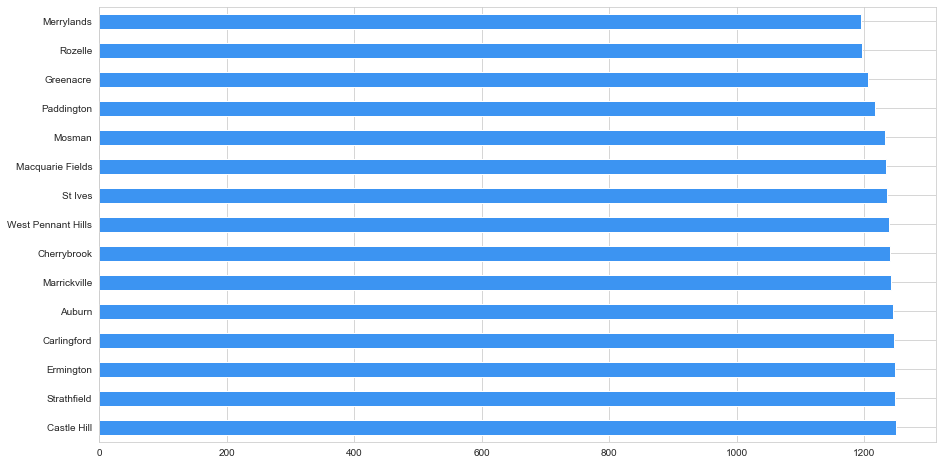

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
df["suburb"].value_counts()[:15].plot.barh(color="#3C94F2")

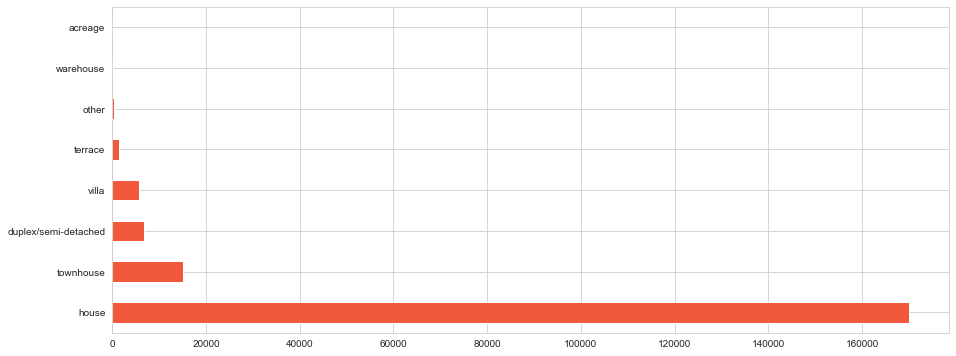

In [12]:
plt.figure(figsize=(15,6))
df["propType"].value_counts().plot.barh(color="#F2583C")

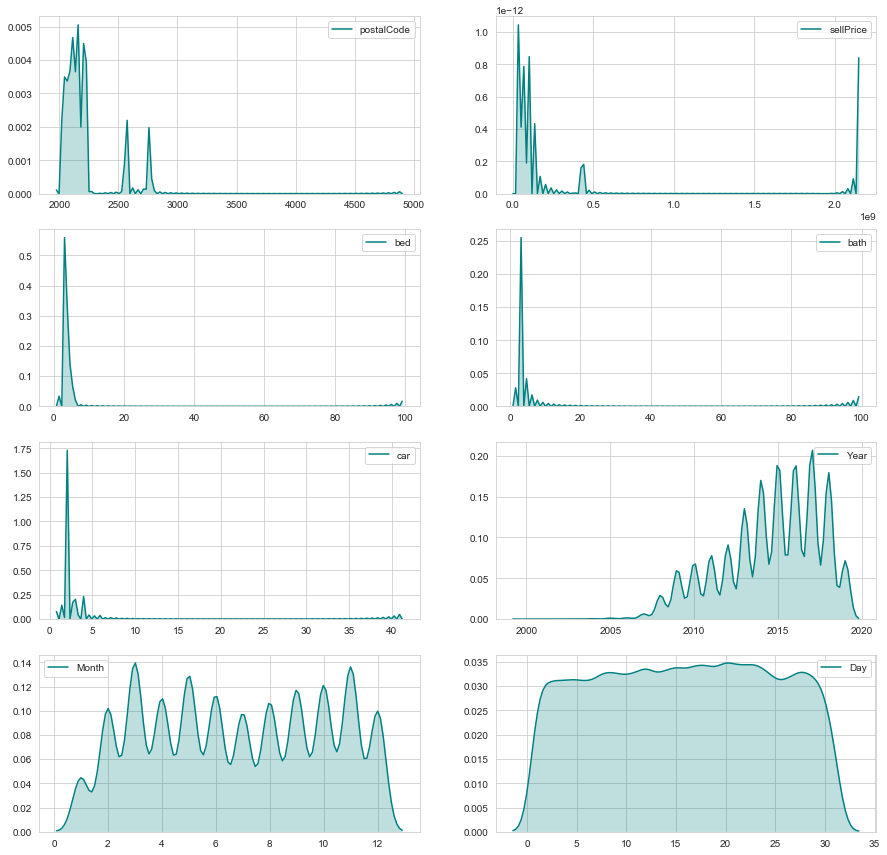

In [13]:
data_num=df.select_dtypes(["float64","int64"]).columns
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(15,15))
count=0
for i in range(4):
    for j in range(2):
        sns.kdeplot(df[data_num[count]],ax=ax[i][j],shade=True,color="#008080")
        count+=1

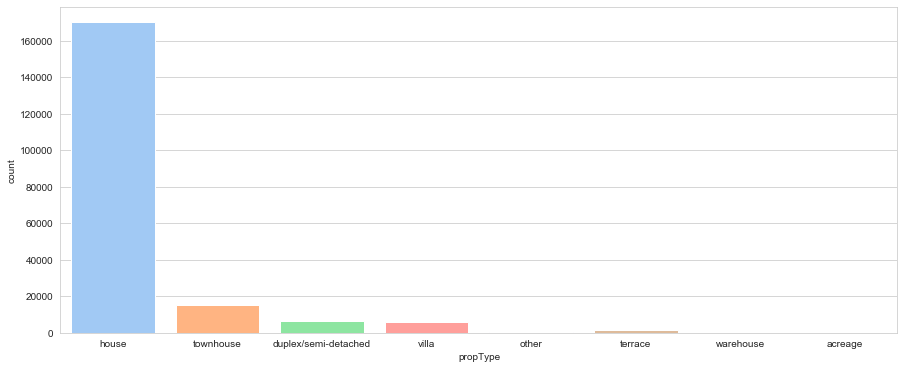

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(df["propType"],saturation=1,palette="pastel")

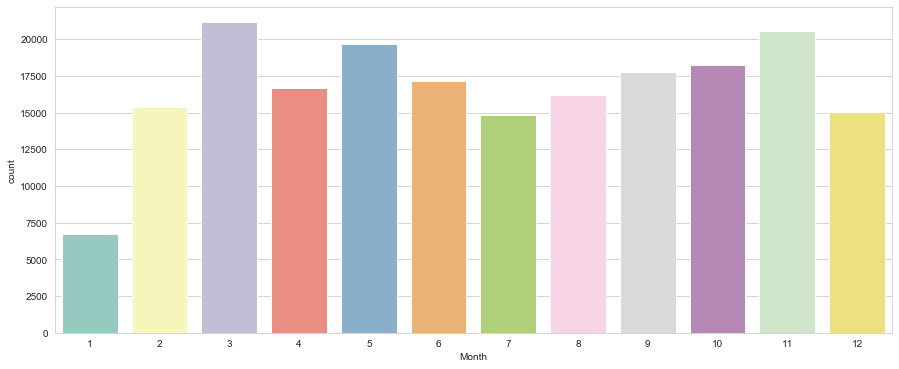

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(df["Month"],palette="Set3")

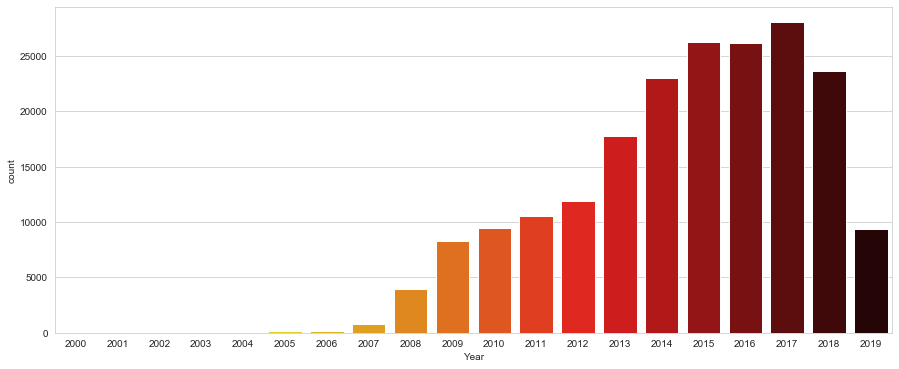

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(df["Year"],palette="hot_r")

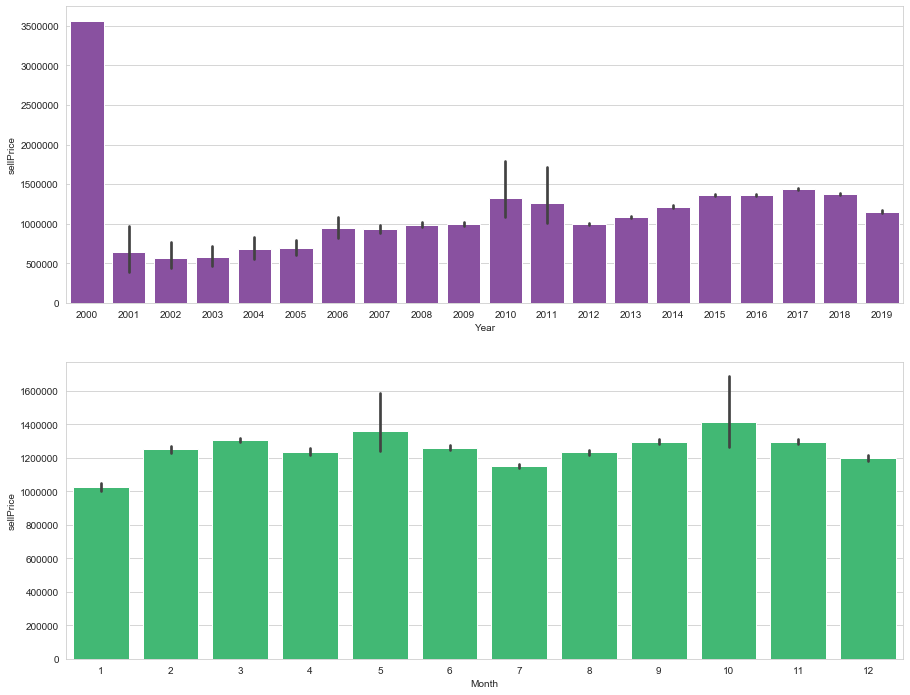

In [17]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.barplot(data=df,x="Year",y="sellPrice",color="#8E44AD",ax=ax[0])
sns.barplot(data=df,x="Month",y="sellPrice",color="#2ECC71",ax=ax[1])

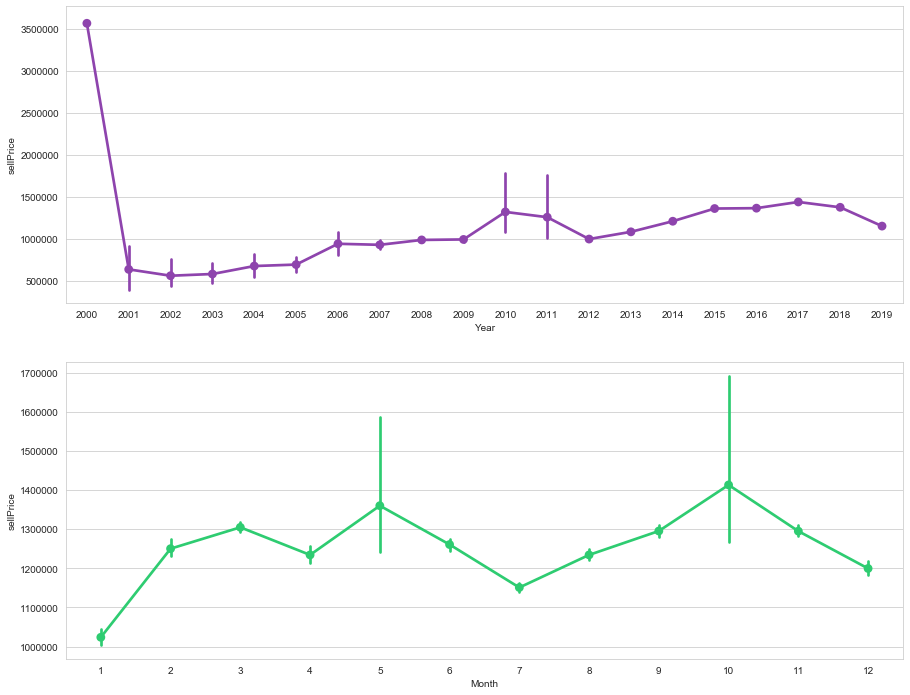

In [18]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.pointplot(data=df,x="Year",y="sellPrice",color="#8E44AD",ax=ax[0])
sns.pointplot(data=df,x="Month",y="sellPrice",color="#2ECC71",ax=ax[1])

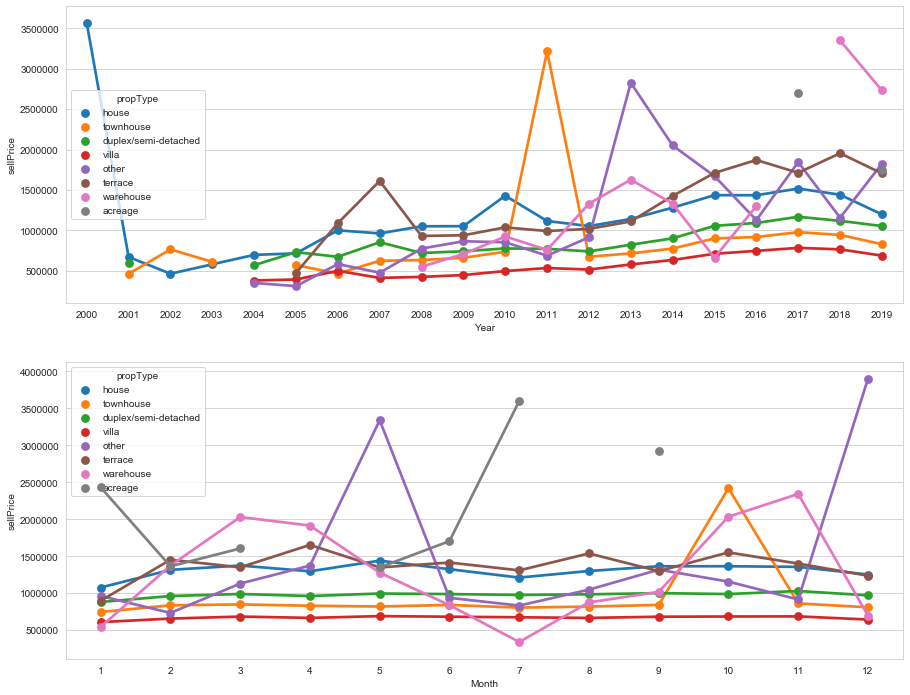

In [19]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.pointplot(data=df,x="Year",y="sellPrice",hue="propType",ax=ax[0],ci=None)
sns.pointplot(data=df,x="Month",y="sellPrice",hue="propType",ax=ax[1],ci=None)

In [20]:
heat = pd.pivot_table(data = df,
                    index = 'Month',
                    values = 'sellPrice',
                    columns = 'Year')
heat.fillna(0, inplace = True)
heat

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,5.425000e+05,4.711429e+05,5.390000e+05,8.738989e+05,7.761932e+05,8.655699e+05,9.408946e+05,8.351405e+05,8.847274e+05,1.033905e+06,1.064638e+06,1.082105e+06,1.098014e+06,1.111665e+06,1.103597e+06
2,0.0,960000.000000,0.0,1.170000e+06,6.810000e+05,5.883846e+05,9.530778e+05,8.098638e+05,1.222199e+06,8.274488e+05,1.077278e+06,1.095220e+06,9.476650e+05,9.870070e+05,1.240268e+06,1.316328e+06,1.328119e+06,1.450235e+06,1.403733e+06,1.202588e+06
3,0.0,896000.000000,0.0,0.000000e+00,1.023571e+06,7.204231e+05,6.806750e+05,1.061631e+06,1.016767e+06,9.577356e+05,1.218498e+06,1.129113e+06,1.076347e+06,1.080301e+06,1.224513e+06,1.353020e+06,1.411728e+06,1.493161e+06,1.530250e+06,1.230277e+06
4,0.0,463000.000000,765000.0,3.500000e+05,6.400000e+05,5.895781e+05,5.430357e+05,1.007723e+06,1.120504e+06,1.071910e+06,1.046887e+06,1.065464e+06,9.836697e+05,1.020852e+06,1.201937e+06,1.285391e+06,1.347292e+06,1.443569e+06,1.359263e+06,1.182867e+06
5,0.0,0.000000,442500.0,0.000000e+00,5.578333e+05,1.536000e+06,9.557273e+05,9.076435e+05,1.027770e+06,9.338651e+05,3.268803e+06,1.058386e+06,1.063544e+06,1.080215e+06,1.187194e+06,1.381526e+06,1.358007e+06,1.497958e+06,1.387143e+06,1.061774e+06
6,0.0,0.000000,485000.0,3.210000e+05,5.450000e+05,7.477833e+05,1.663132e+06,8.595243e+05,1.110492e+06,9.907050e+05,1.145334e+06,9.979122e+05,9.768713e+05,1.067895e+06,1.216359e+06,1.427008e+06,1.375798e+06,1.479885e+06,1.412025e+06,1.110175e+06
7,0.0,0.000000,0.0,5.875000e+05,6.600000e+05,6.612222e+05,1.013944e+06,7.874846e+05,9.348692e+05,9.219211e+05,9.417419e+05,9.419387e+05,9.129772e+05,9.909445e+05,1.117141e+06,1.330783e+06,1.230604e+06,1.331828e+06,1.214728e+06,1.110664e+06
8,0.0,0.000000,0.0,1.100000e+06,5.045714e+05,5.981000e+05,1.696375e+06,8.558083e+05,9.708809e+05,9.337268e+05,1.060277e+06,9.420094e+05,9.909445e+05,1.057105e+06,1.171205e+06,1.401863e+06,1.340230e+06,1.392379e+06,1.378613e+06,0.000000e+00
9,0.0,372000.000000,0.0,6.900000e+05,9.348462e+05,8.413000e+05,1.064833e+06,8.916254e+05,1.056483e+06,1.049700e+06,1.154134e+06,9.820021e+05,1.020478e+06,1.120323e+06,1.242007e+06,1.423952e+06,1.416687e+06,1.505014e+06,1.456903e+06,0.000000e+00


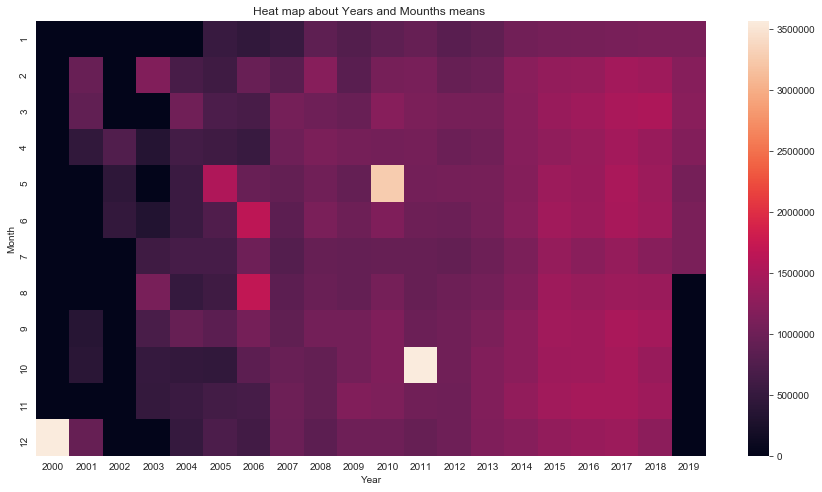

In [21]:
plt.figure(figsize=(15,8))
plt.title('Heat map about Years and Mounths means ')
sns.heatmap(heat)

# Data Classification

In [22]:
list_value_counts=(df.groupby("suburb")["sellPrice"].mean().sort_values())[::-1].astype("int")
list_value_counts[:5]

suburb
Point Piper       10901444
Darling Point      5262649
Collaroy Beach     4926500
Watsons Bay        4612877
Woolwich           4526818
Name: sellPrice, dtype: int32

In [23]:
suburb_grup1=list(list_value_counts[:137].index)
suburb_grup2=list(list_value_counts[137:274].index)
suburb_grup3=list(list_value_counts[274:411].index)
suburb_grup4=list(list_value_counts[411:548].index)
suburb_grup5=list(list_value_counts[548:685].index)

In [24]:
df.replace(suburb_grup1,"Group1",inplace=True)
df.replace(suburb_grup2,"Group2",inplace=True)
df.replace(suburb_grup3,"Group3",inplace=True)
df.replace(suburb_grup4,"Group4",inplace=True)
df.replace(suburb_grup5,"Group5",inplace=True)
df.head()

,suburb,postalCode,sellPrice,bed,bath,car,propType,Year,Month,Day
0,Group2,2107,1210000,4.0,2,2.0,house,2019,6,19
1,Group2,2107,2250000,4.0,3,4.0,house,2019,6,13
2,Group1,2107,2920000,3.0,3,2.0,house,2019,6,7
3,Group2,2107,1530000,3.0,1,2.0,house,2019,5,28
4,Group1,2107,8000000,5.0,4,4.0,house,2019,5,22


In [25]:
dff=df.copy()

# Get Dummies

In [26]:
df = pd.get_dummies(df,columns= ["suburb","propType"], prefix= ["suburb","propType"])
df.head()

,postalCode,sellPrice,bed,bath,car,Year,Month,Day,suburb_Group1,suburb_Group2,...,suburb_Group4,suburb_Group5,propType_acreage,propType_duplex/semi-detached,propType_house,propType_other,propType_terrace,propType_townhouse,propType_villa,propType_warehouse
0,2107,1210000,4.0,2,2.0,2019,6,19,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2107,2250000,4.0,3,4.0,2019,6,13,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2107,2920000,3.0,3,2.0,2019,6,7,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2107,1530000,3.0,1,2.0,2019,5,28,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2107,8000000,5.0,4,4.0,2019,5,22,1,0,...,0,0,0,0,1,0,0,0,0,0


# Outlier Data

### Visualizing Outliers Before Editing

In [27]:
data_num=list(df.select_dtypes(["int64","float64"]).columns)
data_num.remove("Year")
data_num.remove("Day")
data_num.remove("Month")

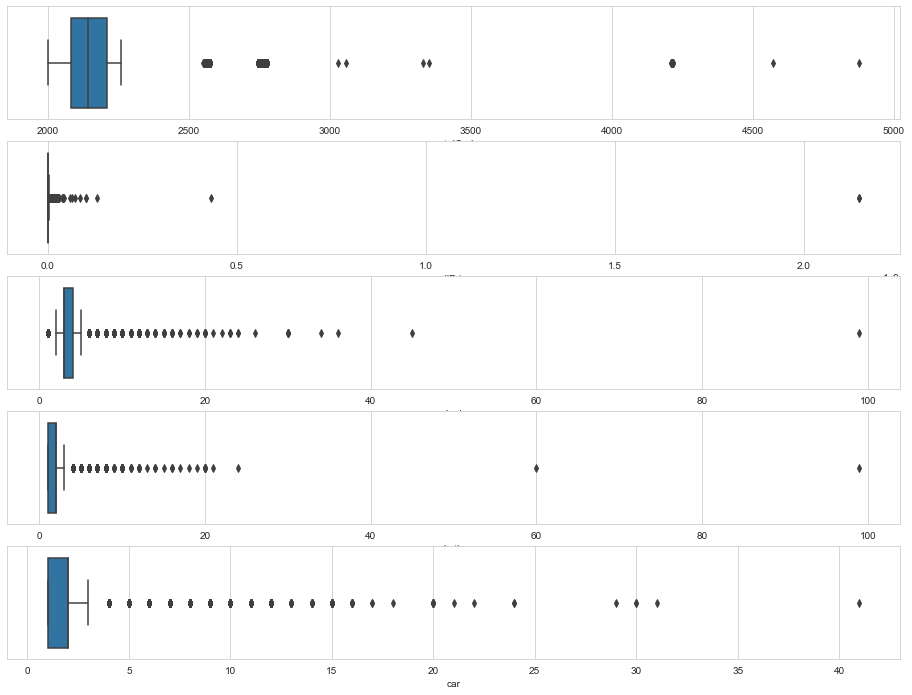

In [28]:
fig, ax =plt.subplots(nrows=5,ncols=1,figsize=(16,12))
for i in range(5):
    sns.boxplot(x = df[data_num[i]],ax=ax[i])
    count = count+1

In [29]:
lower_and_upper = {}

for col in data_num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = 1.5*(q3-q1)
    
    lower_bound = q1-iqr
    upper_bound = q3+iqr
    
    lower_and_upper[col] = (lower_bound, upper_bound)
    df.loc[(df.loc[:,col]<lower_bound),col]=lower_bound*0.75
    df.loc[(df.loc[:,col]>upper_bound),col]=upper_bound*1.25
    
    
lower_and_upper

{'postalCode': (1888.5, 2404.5),
 'sellPrice': (-412500.0, 2607500.0),
 'bed': (1.5, 5.5),
 'bath': (-0.5, 3.5),
 'car': (-0.5, 3.5)}

### Visualizing Outliers After Editing

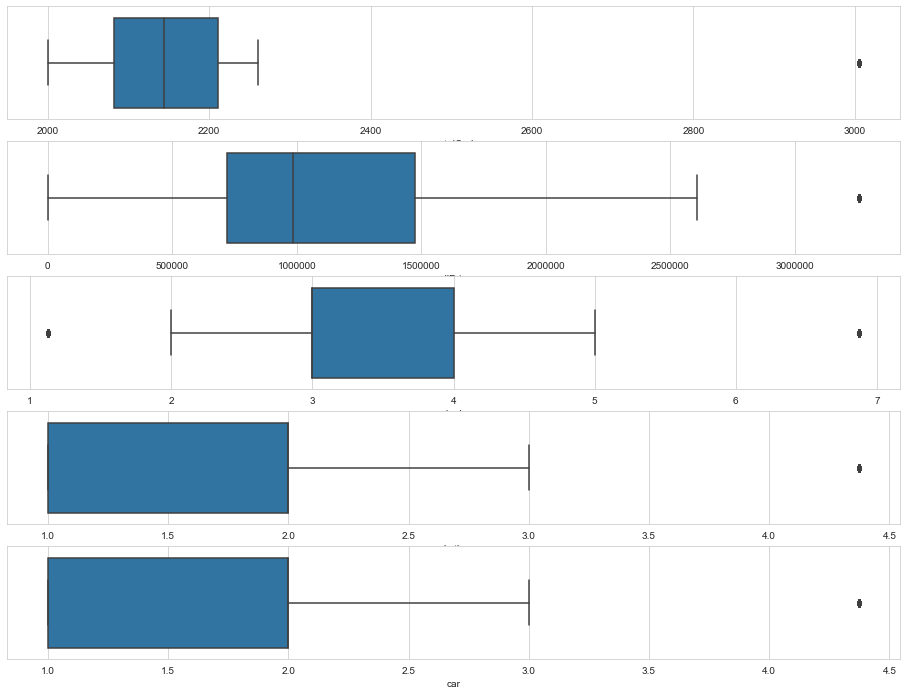

In [30]:
fig, ax =plt.subplots(nrows=5,ncols=1,figsize=(16,12))
for i in range(5):
    sns.boxplot(x = df[data_num[i]],ax=ax[i])
    count = count+1

# Missing Data Filling

In [31]:
import missingno as msno

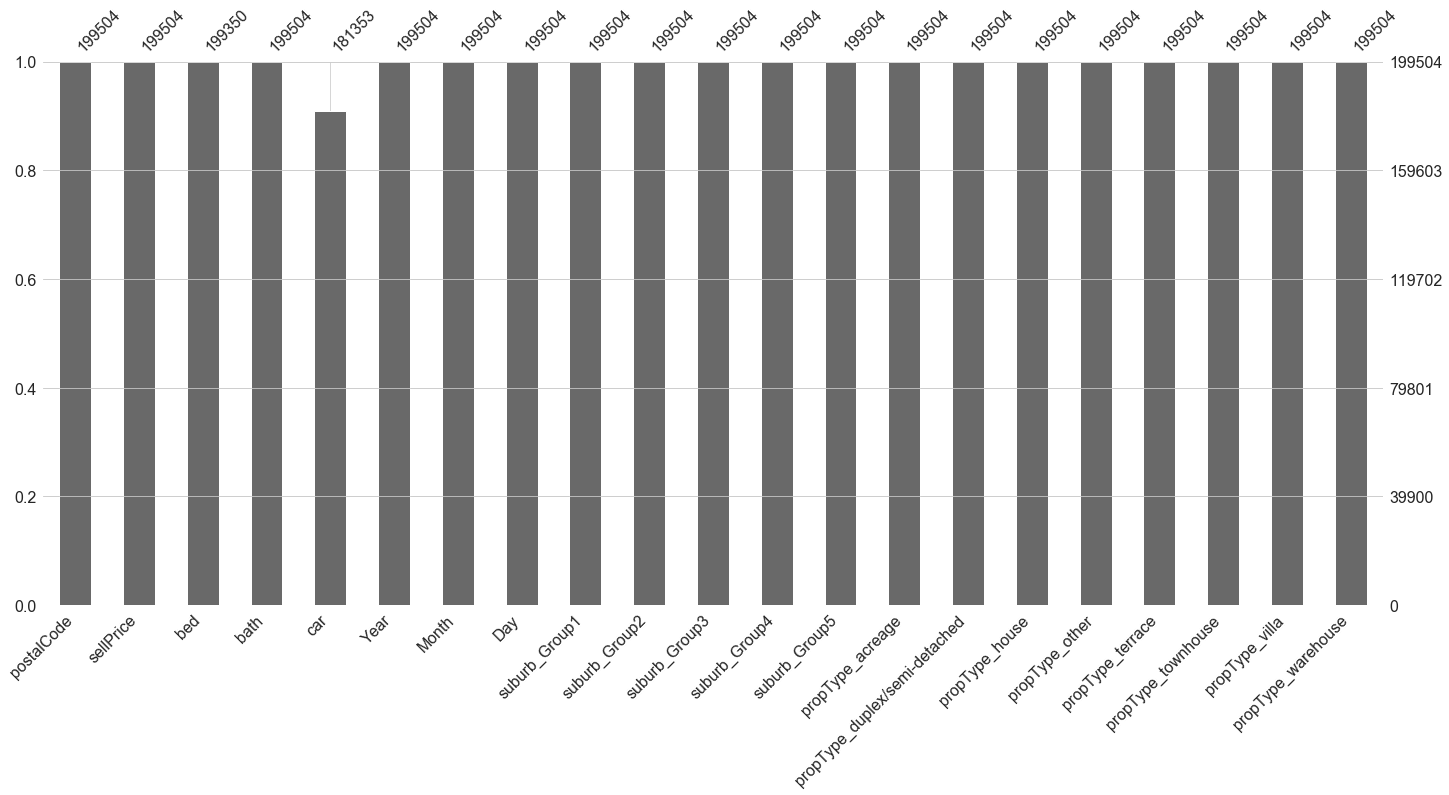

In [32]:
msno.bar(df)

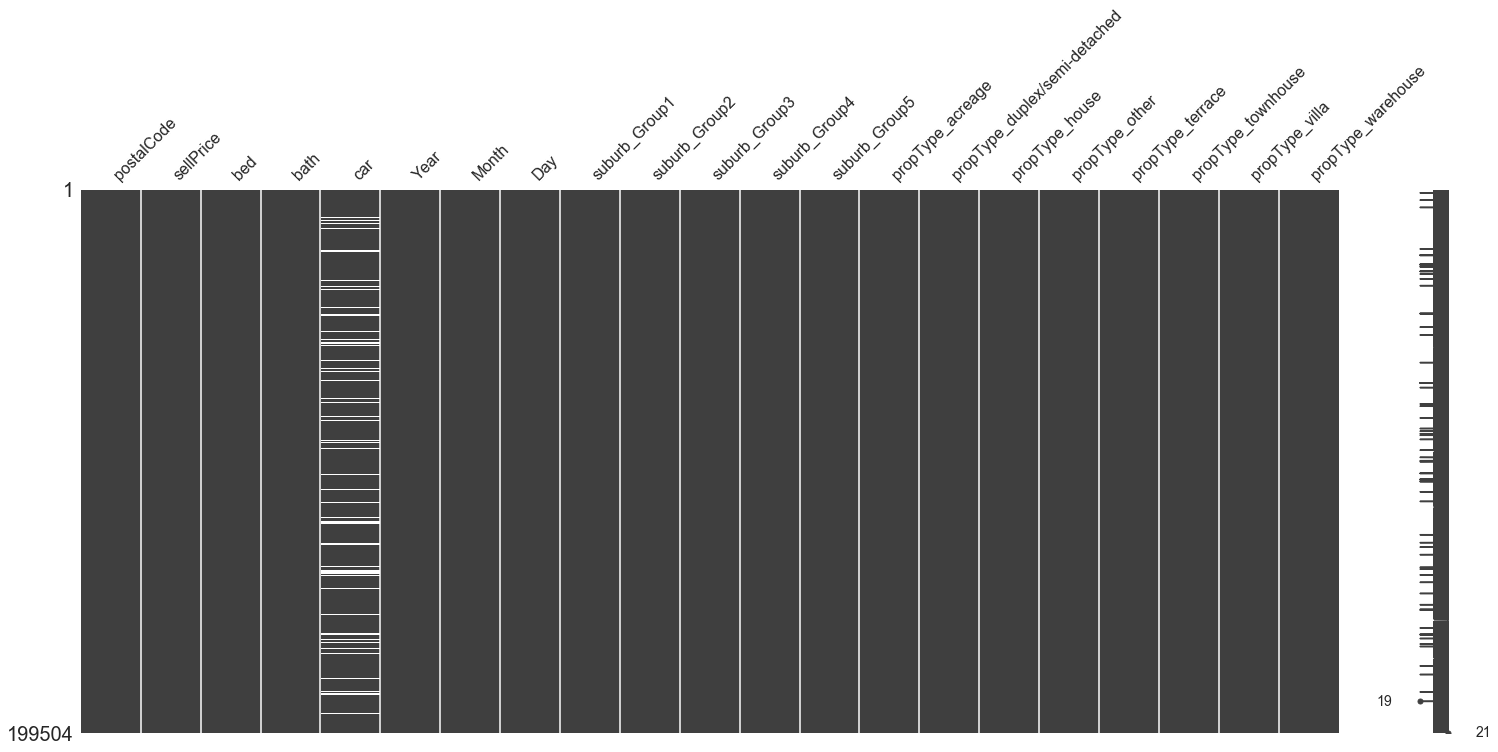

In [33]:
msno.matrix(df)

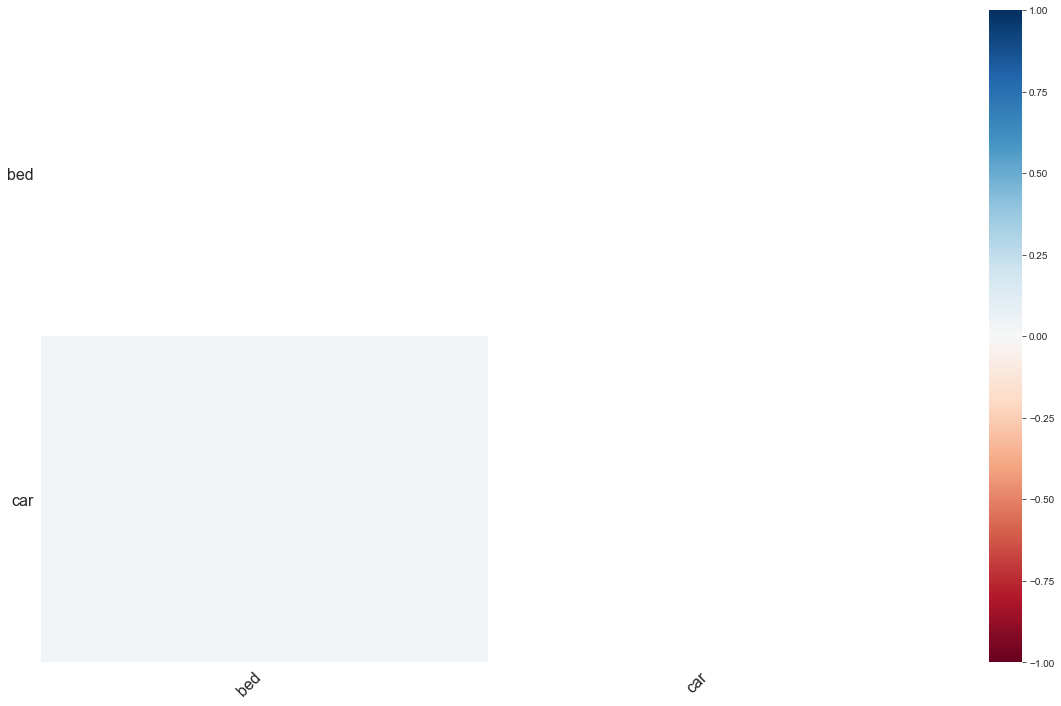

In [34]:
msno.heatmap(df)

In [35]:
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer()

In [36]:
df["bed"]=knn_imputer.fit_transform(df[["bed"]])
df["car"]=knn_imputer.fit_transform(df[["car"]])

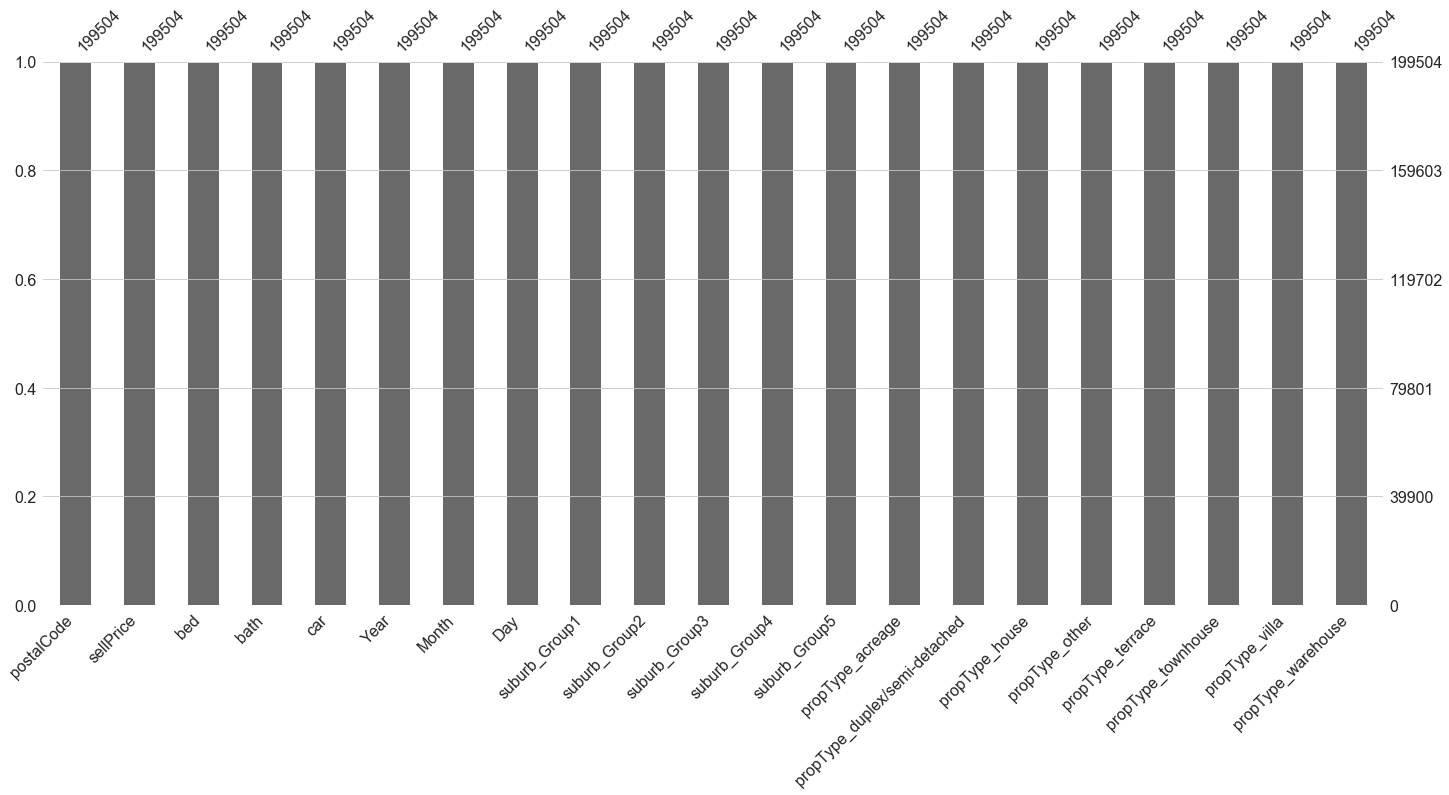

In [37]:
msno.bar(df)

# Building a Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
X=df.drop(["sellPrice","propType_acreage","propType_warehouse","Day"],axis=1)
Y=df["sellPrice"]

### Stats Models

In [40]:
import statsmodels.api as sm

In [41]:
X=sm.add_constant(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
stats_model=sm.OLS(Y_train,X_train).fit()
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:              sellPrice   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.888e+04
Date:                Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:16:14   Log-Likelihood:            -2.2899e+06
No. Observations:              159603   AIC:                         4.580e+06
Df Residuals:                  159586   BIC:                         4.580e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Sklearn Model

In [43]:
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(X.iloc[:,1:],Y,test_size=0.2,random_state=42)
sklearn_model=LinearRegression().fit(X_train,Y_train)

In [44]:
print("R2 Score : ",r2_score(Y_train,sklearn_model.predict(X_train)))
print("Train RMSE : ",np.sqrt(mean_squared_error(Y_train,sklearn_model.predict(X_train))))
print("Test RMSE : ",np.sqrt(mean_squared_error(Y_test,sklearn_model.predict(X_test))))

R2 Score :  0.6542939489781376
Train RMSE :  411914.28192840575
Test RMSE :  416302.9475045909


# MinMaxScaler on Data

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
array = list(dff.select_dtypes(include=["float64","int64"]))
dff.loc[:,array] = scaler.fit_transform(dff.loc[:,array])

dff=pd.get_dummies(dff,columns= ["suburb","propType"], prefix= ["suburb","propType"])


dff["bed"]=knn_imputer.fit_transform(dff[["bed"]])
dff["car"]=knn_imputer.fit_transform(dff[["car"]])

In [46]:
X=dff.drop(["sellPrice"],axis=1)
Y=dff["sellPrice"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [47]:
sklearn_model=LinearRegression().fit(X,Y)
print("R2 Score :",r2_score(Y_train,sklearn_model.predict(X_train)))
print("Train RMSE : ",np.sqrt(mean_squared_error(Y_train,sklearn_model.predict(X_train))))
print("Test RMSE: ",np.sqrt(mean_squared_error(Y_test,sklearn_model.predict(X_test))))

R2 Score : 0.014564206665260593
Train RMSE :  0.002530624266017487
Test RMSE:  0.0051228918332349455
